In [77]:
from WavefrontPSF.donutengine import DECAM_Model_Wavefront

data = pd.read_csv('/Users/cpd/Projects/WavefrontPSF/meshes/ComboMeshes2/Mesh_Science-20140212s2-v1i2_All_train.csv')
WF = DECAM_Model_Wavefront(data)

num = 100

# get the focal plane coords
x = []
y = []
for extname in WF.decaminfo.infoDict.keys():
    for i in xrange(num):
        xi = np.random.random() * 1024 * 2
        yi = np.random.random() * 2048 * 2
        xi, yi = WF.decaminfo.getPosition(extname, xi, yi)
        x.append(xi)
        y.append(yi)
x = np.array(x)
y = np.array(y)

In [78]:
WF.data = pd.DataFrame({'x': x, 'y':y})
misalignment = {'rzero': 0.22}
psfs = WF.get_psf_stats(x, y)

In [79]:
%matplotlib inline

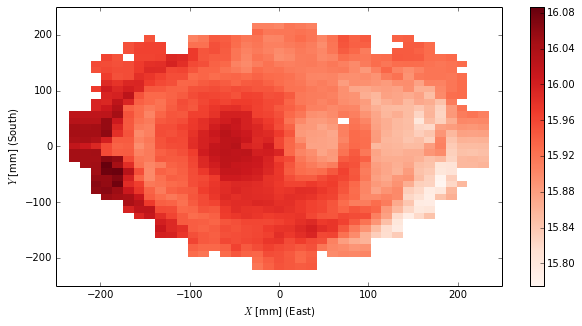

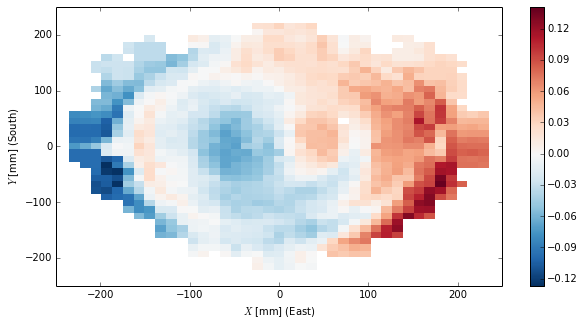

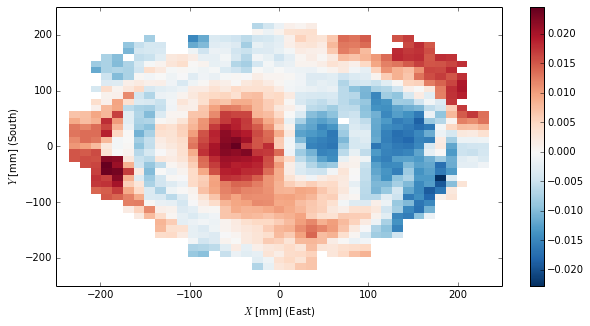

In [111]:
WF.reduce(num_bins=40)
WF.field['My-e0'] = (WF.field['Mx'] - WF.field['Mx'].mean()) + WF.field['z8']
WF.plot_field('Mx');
WF.plot_field('z8');
WF.plot_field('My-e0');
